(534, 200, 200, 3)
(507, 200, 200, 3)
(425, 200, 200, 3)
(423, 200, 200, 3)


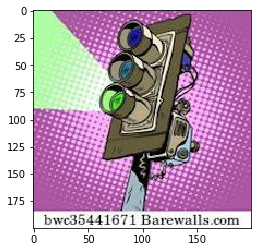

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (200,200,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,1000):
    x = 'green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (200,200,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,1000):
    x = 'red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (200,200,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,1000):
    x = 'red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (200,200,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (200,200,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,1000):
    x = 'green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (200,200,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

In [4]:
import numpy as np
def same_shuffle(arr1,arr2):
#     assert arr1.size == arr2.size
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [15]:
greenlist = list(greendata)
redlist = list(reddata)
greencarlist = list(greencardata)
redcarlist = list(redcardata)
datalist = greenlist+ greencarlist  + redlist + redcarlist
data = np.array(datalist)

In [16]:
y_green = np.zeros(534+507)
y_red = np.zeros(425+423)+1
y_green_list = list(y_green)
y_red_list = list(y_red)
y_list = y_green_list + y_red_list
y = np.array(y_list)
data, y = same_shuffle(data, y)

1889


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [18]:
data_test = data[1500:]
data = data[:1500]
y_test = y[1500:]
y = y[:1500]

In [19]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 135424)           

In [ ]:
history = model.fit(data, y, epochs=10,validation_data=(data_test,y_test))

Train on 1500 samples, validate on 389 samples
Epoch 1/10
1500/1500 [==============================] - 41s 27ms/sample - loss: 82.2020 - accuracy: 0.5887 - val_loss: 0.5783 - val_accuracy: 0.6478
Epoch 2/10
1500/1500 [==============================] - 41s 27ms/sample - loss: 0.5460 - accuracy: 0.7367 - val_loss: 0.6431 - val_accuracy: 0.6093
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/sample - loss: 0.4463 - accuracy: 0.8067 - val_loss: 0.6791 - val_accuracy: 0.6632
Epoch 4/10
1500/1500 [==============================] - 41s 28ms/sample - loss: 0.5176 - accuracy: 0.7487 - val_loss: 0.8431 - val_accuracy: 0.6015
Epoch 5/10
1500/1500 [==============================] - 41s 27ms/sample - loss: 0.3102 - accuracy: 0.8693 - val_loss: 1.0438 - val_accuracy: 0.6761
Epoch 6/10
1500/1500 [==============================] - 41s 27ms/sample - loss: 0.2308 - accuracy: 0.9147 - val_loss: 1.2211 - val_accuracy: 0.6915
Epoch 7/10
1500/1500 [==============================] - 42s 28ms

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [20]:
print(model.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])

[[4.6815796e-09 1.0000000e+00]
 [1.2267212e-09 1.0000000e+00]]
1.0 1.0


In [21]:
x = np.arange(100).reshape(10,10)

In [22]:
import tensorflow.lite as tflite

In [23]:
model.save('nn.h5')

In [24]:
model2 = tflite.loa

In [25]:
print(model2.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])

[[4.6815796e-09 1.0000000e+00]
 [1.2267212e-09 1.0000000e+00]]
1.0 1.0
